**Develop the ML model(s) to predict the credit risk(low or high) for a given applicant.** 

**Business Constraint:** Note that it is worse to state an applicant as a low credit risk when they are actually a high risk, than it is to state an applicant to be a high credit risk when they aren’t.

**Provide the answers for the below points:**

1. Explain your intuition behind the features used for modeling.
2. Are you creating new derived features? If yes explain the intuition behind them.
3. Are there missing values? If yes how you plan to handle it.
4. How categorical features are handled for modeling.
5. Describe the features correlation using correlation matrix. Tell us about few correlated feature & share your understanding on why they are correlated.
6. Do you plan to drop the correlated feature? If yes then how.
7. Which ML algorithm you plan to use for modeling.
8. **Train two (at least) ML models** to predict the credit risk & provide the confusion matrix for each model.
9. How you will select the hyperparameters for models trained in above step.
10. Which metric(s) you will choose to select between the set of models.
11. Explain how you will export the trained models & deploy it for prediction in production.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#### We will be usins the data that was merged, cleaned and explored in task 1.

In [4]:
df= pd.read_csv('df.csv')

In [5]:
df.head()

,Unnamed: 0,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,...,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
0,0,67,male,single,1,own,4,skilled employee / official,7 years,7 years,...,6,electronic equipment,1169000,4,real estate,0,0,2,critical/pending loans at other banks,0
1,1,22,female,divorced/separated/married,1,own,2,skilled employee / official,1 year,4 years,...,48,electronic equipment,5951000,2,real estate,0,0,1,existing loans paid back duly till now,1
2,2,49,male,single,2,own,3,unskilled - resident,4 years,7 years,...,12,education,2096000,2,real estate,0,0,1,critical/pending loans at other banks,0
3,3,45,male,single,2,for free,4,skilled employee / official,4 years,7 years,...,42,FF&E,7882000,2,building society savings agreement/life insurance,0,1,1,existing loans paid back duly till now,0
4,4,53,male,single,2,for free,4,skilled employee / official,1 year,4 years,...,24,new vehicle,4870000,3,car or other,0,0,2,delay in paying off loans in the past,1


We will drop the column 'Unnamed' as it was created to index the rows only.


In [6]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   Primary_applicant_age_in_years               1000 non-null   int64 
 1   Gender                                       1000 non-null   object
 2   Marital_status                               1000 non-null   object
 3   Number_of_dependents                         1000 non-null   int64 
 4   Housing                                      1000 non-null   object
 5   Years_at_current_residence                   1000 non-null   int64 
 6   Employment_status                            1000 non-null   object
 7   Has_been_employed_for_at_least               1000 non-null   object
 8   Has_been_employed_for_at_most                1000 non-null   object
 9   Foreign_worker                               1000 non-null   int64 
 10  Savings_accou

### Describing the correlation

In [8]:
df.corr().T

,Primary_applicant_age_in_years,Number_of_dependents,Years_at_current_residence,Foreign_worker,Months_loan_taken_for,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,high_risk_applicant
Primary_applicant_age_in_years,1.000000,0.118201,0.266419,0.006151,-0.036136,0.032716,0.058266,-0.018357,-0.023923,0.149254,-0.091127
Number_of_dependents,0.118201,1.000000,0.042643,-0.077071,-0.023834,0.017142,-0.071207,-0.032817,0.036589,0.109667,-0.003015
Years_at_current_residence,0.266419,0.042643,1.000000,0.054097,0.034067,0.028926,0.049302,0.001623,-0.028334,0.089625,0.002967
Foreign_worker,0.006151,-0.077071,0.054097,1.000000,0.138196,0.050050,0.090024,-0.066338,-0.097256,0.009717,0.082079
Months_loan_taken_for,-0.036136,-0.023834,0.034067,0.138196,1.000000,0.624984,0.074749,0.029698,-0.039594,-0.011284,0.214927
Principal_loan_amount,0.032716,0.017142,0.028926,0.050050,0.624984,1.000000,-0.271316,0.079076,-0.065237,0.020795,0.154739
EMI_rate_in_percentage_of_disposable_income,0.058266,-0.071207,0.049302,0.090024,0.074749,-0.271316,1.000000,-0.013048,-0.006429,0.021669,0.072404
Has_coapplicant,-0.018357,-0.032817,0.001623,-0.066338,0.029698,0.079076,-0.013048,1.000000,-0.048426,-0.006001,0.062728
Has_guarantor,-0.023923,0.036589,-0.028334,-0.097256,-0.039594,-0.065237,-0.006429,-0.048426,1.000000,-0.024682,-0.055039
Number_of_existing_loans_at_this_bank,0.149254,0.109667,0.089625,0.009717,-0.011284,0.020795,0.021669,-0.006001,-0.024682,1.000000,-0.045732


### Displaying the correlation

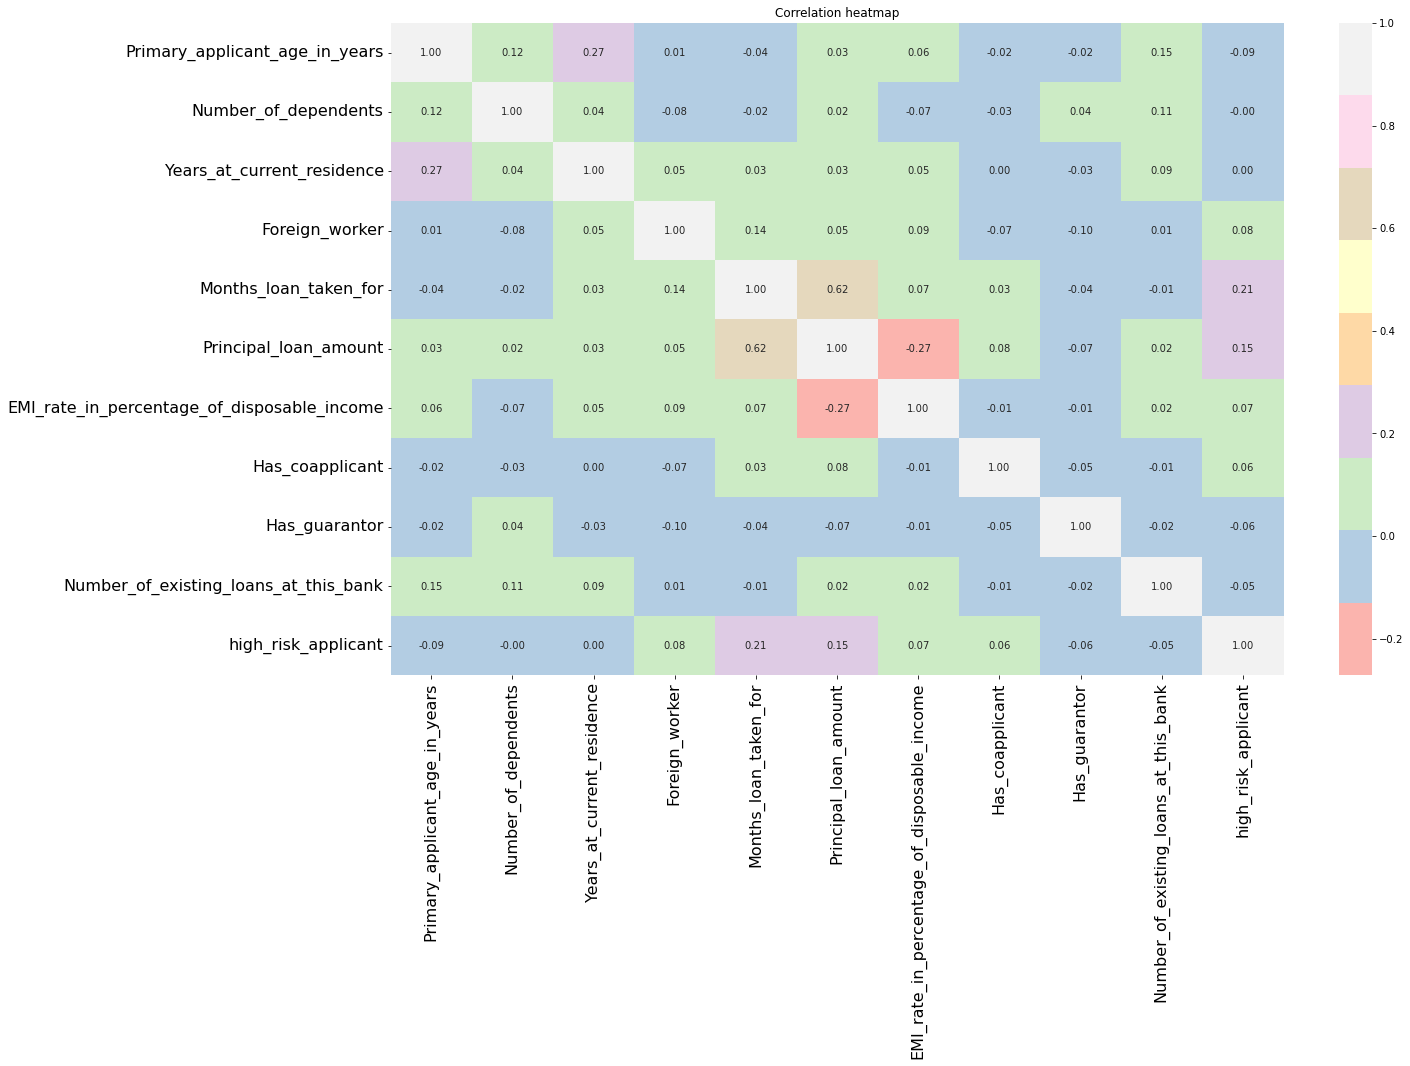

In [10]:
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(),annot=True,fmt = '.2f',cmap='Pastel1')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('Correlation heatmap');

# INFERENCE:

1.High_risk_applicant has high positive correlation with months_loan_taken_for and Principal_loan_amount
<br>2.The principal loan amount has high positive correlation with months loan taken for as if the principal loan amount increases the time needed to repay it will also increase.
<br>3.We can also see that Principal loan amount has high r=negative correlation with the EMI Rate.(As the loan amount will increase, EMI rate will decrease)

# Feature Engineering

1.We have already done the data cleaning and EDA process in the first task.
<br>2.We will first bin the age, number of month loan taken column into some part categories.
<br>3.We will then convert the categorical data into numerical features for model training.
<br>4.We will scale the data using StandardScalar to fit into a similar scale for better predictions.


#### Displaying all the unique variables and number of unique variables in categorical and numerical column


In [14]:
categorical_columns = df.select_dtypes(include=['object'])
for col in categorical_columns:
  print(f'Unique values in categorical columns {col} are: {categorical_columns[col].unique()} and number of categories are {len(categorical_columns[col].unique())} \n')

Unique values in categorical columns Gender are: ['male' 'female'] and number of categories are 2 

Unique values in categorical columns Marital_status are: ['single' 'divorced/separated/married' 'divorced/separated'
 'married/widowed'] and number of categories are 4 

Unique values in categorical columns Housing are: ['own' 'for free' 'rent'] and number of categories are 3 

Unique values in categorical columns Employment_status are: ['skilled employee / official' 'unskilled - resident'
 'management / self-employed / highly qualified employee / officer'
 'unemployed / unskilled - non-resident'] and number of categories are 4 

Unique values in categorical columns Has_been_employed_for_at_least are: ['7 years' '1 year' '4 years' '0 year'] and number of categories are 4 

Unique values in categorical columns Has_been_employed_for_at_most are: ['7 years' '4 years' '0 year' '1 year'] and number of categories are 4 

Unique values in categorical columns Savings_account_balance are: ['Low' 

In [15]:
numerical_columns = df._get_numeric_data()
for col in numerical_columns:
  print(f'Unique values in numerical columns {col} are: {numerical_columns[col].unique()[:15]}\n')

Unique values in numerical columns Primary_applicant_age_in_years are: [67 22 49 45 53 35 61 28 25 24 60 32 44 31 48]

Unique values in numerical columns Number_of_dependents are: [1 2]

Unique values in numerical columns Years_at_current_residence are: [4 2 3 1]

Unique values in numerical columns Foreign_worker are: [1 0]

Unique values in numerical columns Months_loan_taken_for are: [ 6 48 12 42 24 36 30 15  9 10  7 60 18 45 11]

Unique values in numerical columns Principal_loan_amount are: [1169000 5951000 2096000 7882000 4870000 9055000 2835000 6948000 3059000
 5234000 1295000 4308000 1567000 1199000 1403000]

Unique values in numerical columns EMI_rate_in_percentage_of_disposable_income are: [4 2 3 1]

Unique values in numerical columns Has_coapplicant are: [0 1]

Unique values in numerical columns Has_guarantor are: [0 1]

Unique values in numerical columns Number_of_existing_loans_at_this_bank are: [2 1 3 4]

Unique values in numerical columns high_risk_applicant are: [0 1]



### We will be creating bins for the categorical features
 1.Creating bins of age to distribute age range in three categories
<br>2.As age ranges from 19 to 75 we will divide t into three categories youth, middle age and senior citizen

In [17]:
df['applicant_age'] = np.nan
df.loc[df.Primary_applicant_age_in_years<=30,'applicant_age'] = 'youth'
df.loc[(df.Primary_applicant_age_in_years > 31) & (df.Primary_applicant_age_in_years < 60), 'applicant_age'] = 'middle_age'
df.loc[(df.Primary_applicant_age_in_years >=60 ), 'applicant_age'] = 'senior_citizen'

1.Creating bins of Months_loan_taken_for to distribute range in three categories
<br>2.As Months_loan_taken_for ranges from 4 to 72, we will divide it into three catgories, 1-12 months, 12-24 months and greather than 24month

In [18]:
df['loan_duration'] = np.nan
df.loc[df.Months_loan_taken_for<=12,'loan_duration'] = '1_12_month'
df.loc[(df.Months_loan_taken_for > 12) & (df.Months_loan_taken_for < 25), 'loan_duration'] = '12_24_month'
df.loc[(df.Months_loan_taken_for >24 ), 'loan_duration'] = 'greater_than_24_month'

#### Since we have created bins for these two columns, we can now drop them.

In [19]:
df.drop(columns = ['Primary_applicant_age_in_years','Months_loan_taken_for'], inplace=True)

### One-Hot-Coding

1.Selecting the variables for one hot coding
<br>2.We will do one hot encoding using get dummies and setting drop first true to avoid dummy variable trap


In [20]:
col_for_one_hot_encoding = ['Gender','Marital_status','Housing','Employment_status','Has_been_employed_for_at_least','Has_been_employed_for_at_most',
 'Savings_account_balance','Purpose','Property','Loan_history','Number_of_dependents','Years_at_current_residence',
 'EMI_rate_in_percentage_of_disposable_income','Number_of_existing_loans_at_this_bank','applicant_age','loan_duration']

In [21]:
df = pd.get_dummies(df,columns=col_for_one_hot_encoding, drop_first=True)

In [22]:
df.head()

,Foreign_worker,Principal_loan_amount,Has_coapplicant,Has_guarantor,high_risk_applicant,Gender_male,Marital_status_divorced/separated/married,Marital_status_married/widowed,Marital_status_single,Housing_own,...,EMI_rate_in_percentage_of_disposable_income_2,EMI_rate_in_percentage_of_disposable_income_3,EMI_rate_in_percentage_of_disposable_income_4,Number_of_existing_loans_at_this_bank_2,Number_of_existing_loans_at_this_bank_3,Number_of_existing_loans_at_this_bank_4,applicant_age_senior_citizen,applicant_age_youth,loan_duration_1_12_month,loan_duration_greater_than_24_month
0,1,1169000,0,0,0,1,0,0,1,1,...,0,0,1,1,0,0,1,0,1,0
1,1,5951000,0,0,1,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,1
2,1,2096000,0,0,0,1,0,0,1,1,...,1,0,0,0,0,0,0,0,1,0
3,1,7882000,0,1,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
4,1,4870000,0,0,1,1,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0


# MODEL TRAINING AND TESTING


Importing all the packages required for Machine Learning

In [87]:
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn.metrics import classification_report, precision_score, recall_score
from sklearn.preprocessing import MinMaxScaler #for feature scaling

#importing library for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

In [88]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [89]:
import xgboost as xgb

We will now remove the target variable from our dataset

In [90]:
x= df.drop('high_risk_applicant',axis=1)

In [91]:
x.shape

(1000, 50)

In [92]:
y=df['high_risk_applicant']
y.shape

(1000,)

Splitting data into train test split

In [93]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state = 52, stratify =y) 

# Feature Scaling

In [94]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train= scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Model 1- Logistic Regression

In [95]:
LR = LogisticRegression()
LR.fit(x_train,y_train)

LogisticRegression()

In [96]:
y_pred = LR.predict(x_test)
y_pred_train = LR.predict(x_train)

#### We will write a function to display the model metrics.

1.This function will display the Train score,test score, Classification Report and the confusion matrix
2.This will help to evaluate teh perfomance of our model
3.We are writing this function so that we dont have to write it over and over again when training other models.

In [97]:
def model_metrics(model,X_train,y_train,y_test,y_pred,y_pred_train):
    print(f'Train Score :{model.score(X_train,y_train)}')
    print(f'Test score :{accuracy_score(y_test,y_pred)}')
    print(f'precision_score: {precision_score(y_test,y_pred)}')
    print(f'recall_score: {recall_score(y_test,y_pred)}')
  
    print('Classification report for Training')
    print(classification_report(y_train,y_pred_train))
    print('Classification report for Testing')
    print(classification_report(y_test,y_pred))
    conf_matrix = confusion_matrix(y_test,y_pred)
    print()

  
    heat_map=sns.heatmap(conf_matrix,annot=True,cmap='Pastel1',fmt='d')
    heat_map.set_xlabel('\n Predicted Values')
    heat_map.set_ylabel('Actual values')
    heat_map.set_title('Confusion Matrix')
   
    heat_map.xaxis.set_ticklabels(['0','1'])
    heat_map.yaxis.set_ticklabels(['0','1']);

Train Score :0.7685714285714286
Test score :0.71
precision_score: 0.5263157894736842
recall_score: 0.3333333333333333
Classification report for Training
              precision    recall  f1-score   support

           0       0.79      0.91      0.85       490
           1       0.68      0.44      0.53       210

    accuracy                           0.77       700
   macro avg       0.73      0.67      0.69       700
weighted avg       0.76      0.77      0.75       700

Classification report for Testing
              precision    recall  f1-score   support

           0       0.75      0.87      0.81       210
           1       0.53      0.33      0.41        90

    accuracy                           0.71       300
   macro avg       0.64      0.60      0.61       300
weighted avg       0.69      0.71      0.69       300




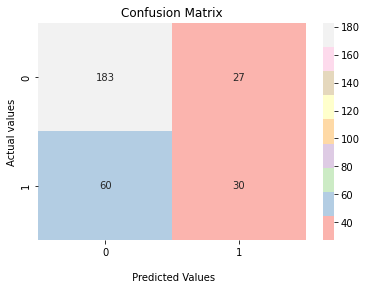

In [98]:
model_metrics(LR,x_train,y_train,y_test,y_pred,y_pred_train)

# Model 2- Random Forest Classifier

In [101]:
rf = RandomForestClassifier()

rf.fit(x_train,y_train)

RandomForestClassifier()

In [102]:
y_pred_rf = rf.predict(X_test)
y_pred_rf_train = rf.predict(x_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Train Score :1.0
Test score :0.66
precision_score: 0.4230769230769231
recall_score: 0.36666666666666664
Classification report for Training
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       490
           1       1.00      1.00      1.00       210

    accuracy                           1.00       700
   macro avg       1.00      1.00      1.00       700
weighted avg       1.00      1.00      1.00       700

Classification report for Testing
              precision    recall  f1-score   support

           0       0.74      0.79      0.76       210
           1       0.42      0.37      0.39        90

    accuracy                           0.66       300
   macro avg       0.58      0.58      0.58       300
weighted avg       0.65      0.66      0.65       300




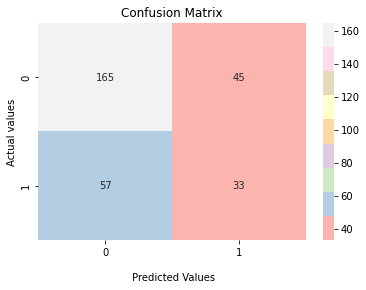

In [103]:
model_metrics(rf,x_train,y_train,y_test,y_pred_rf,y_pred_rf_train)